# Fully Connected Neural Networks 

This tutorial demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement fully connected neural network.
  - Illustrate the non-linear decision rules that multi-layer neural networks can achieve.
  
      
## Importing Python Libraries

In [1]:
%config Completer.use_jedi = False

In [32]:
#%matplotlib inline
#
#

import tensorflow as tf

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sklearn


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
import sys
import numpy as np
import matplotlib.pyplot as plt
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

In [35]:
import pandas as pd

## Loading and Displaying a Synthetic 2D Dataset

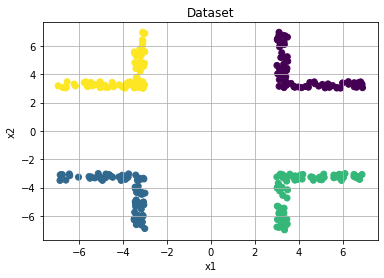

In [36]:
#Generating a synthetic dataset with four classes
nsamples = 300

data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
#data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [37]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

In [38]:
Xtrain_val,Xtest,Ytrain_val,Ytest=train_test_split(X,Y,shuffle=True,test_size=0.25)

In [39]:
Xtrain,Xval,Ytrain,Yval=train_test_split(Xtrain_val,Ytrain_val,test_size=0.33)


In [40]:
len(X_train)

148

In [41]:
len(Xval)

74

## Data Normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)
Xval=scaler.transform(Xval)

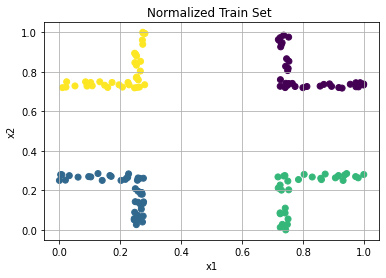

In [44]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set ")
plt.show()

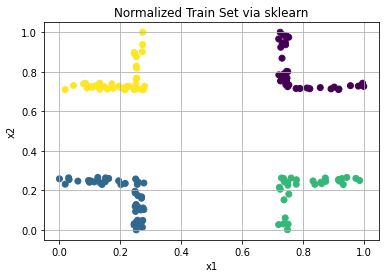

In [45]:
#Displaying the normalized train set
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set via sklearn")
plt.show()

## Representing Labels using one-hot-ecoding

In [46]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[2 3 1 0 2]

Y_oh_train[:5]=
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


## Defining a Fully Connected Neural Network with Keras

In [49]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    out1 = Dense(k, activation='softmax')(inputs)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model

In [50]:
model = my_model(k)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model

In [51]:
batch_size = train_split
nb_epoch = 100
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 1.3702 - accuracy: 0.3919 - val_loss: 1.3463 - val_accuracy: 0.4324
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 1.3619 - accuracy: 0.4054 - val_loss: 1.3403 - val_accuracy: 0.4324
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 1.3538 - accuracy: 0.4054 - val_loss: 1.3345 - val_accuracy: 0.4324
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 1.3459 - accuracy: 0.4122 - val_loss: 1.3289 - val_accuracy: 0.4459
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 1.3382 - accuracy: 0.4189 - val_loss: 1.3233 - val_accuracy: 0.4595
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 1.3307 - accuracy: 0.4189 - val_loss: 1.3179 - val_accuracy: 0.4595
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 1.3235 - accuracy: 0.4257 - val_loss: 1.3126 - val_accuracy: 0.4595
Epoch 8/100
1/1 [==

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.9755700826644897, 0.7162162065505981]

Layer 0
Bias:
 [-0.698681    0.990724   -0.10518324 -0.18685964]
W:
 [[ 1.105769   -1.0759916   0.23009732 -1.4117357 ]
 [ 0.33175433 -1.3205693  -0.35534748  1.394248  ]]



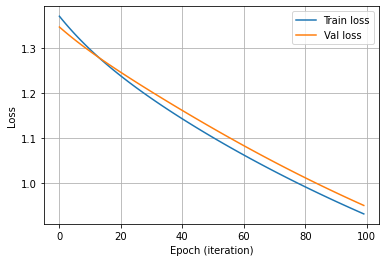

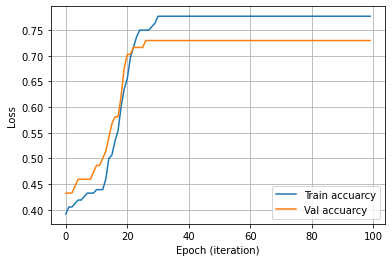

In [52]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

<ipython-input-53-794ffa8a6569>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


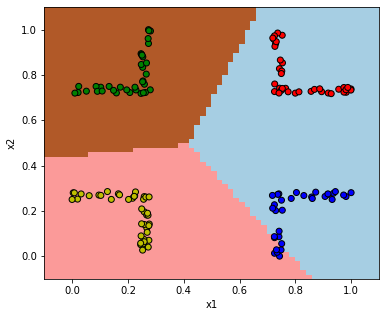

In [53]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [54]:
Z = model.predict(X_grid)

In [65]:
t=pd.DataFrame(history.history)
t.head(5)

,loss,accuracy,val_loss,val_accuracy
0,1.370230,0.391892,1.346277,0.432432
1,1.361875,0.405405,1.340345,0.432432
2,1.353760,0.405405,1.334549,0.432432
3,1.345874,0.412162,1.328881,0.445946
4,1.338206,0.418919,1.323331,0.459459


## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...